---- 

**ADS-505 Final Project** - Travel Insurance Predictions

**Team:** #7

**Team Members:** Jimmy Nguyen, Christopher Robinson, Nima Amin Taghavi

**Date:** 09/20/2021

**Programmin Language:** Python Code

----

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Packages" data-toc-modified-id="Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Data-Set" data-toc-modified-id="Data-Set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Set</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Examing-customers'-Age" data-toc-modified-id="Examing-customers'-Age-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Examing customers' Age</a></span><ul class="toc-item"><li><span><a href="#Age-Distribution" data-toc-modified-id="Age-Distribution-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Age Distribution</a></span></li><li><span><a href="#Age-with-Target-Variable-Overlaid" data-toc-modified-id="Age-with-Target-Variable-Overlaid-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Age with Target Variable Overlaid</a></span></li><li><span><a href="#Normalized-Histogram-with-Target-Variable-Overlaid-on-Age" data-toc-modified-id="Normalized-Histogram-with-Target-Variable-Overlaid-on-Age-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Normalized Histogram with Target Variable Overlaid on Age</a></span></li><li><span><a href="#Age-Groups-Comparison-(20s-vs.-30s)" data-toc-modified-id="Age-Groups-Comparison-(20s-vs.-30s)-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Age Groups Comparison (20s vs. 30s)</a></span></li><li><span><a href="#Percentage-of-Travel-Insurance-Purchases-on-Various-Features" data-toc-modified-id="Percentage-of-Travel-Insurance-Purchases-on-Various-Features-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Percentage of Travel Insurance Purchases on Various Features</a></span></li></ul></li><li><span><a href="#Side-by-side-Box-plots-between-Annual-Income-and-Different-Attributes" data-toc-modified-id="Side-by-side-Box-plots-between-Annual-Income-and-Different-Attributes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Side-by-side Box-plots between Annual Income and Different Attributes</a></span></li></ul></li><li><span><a href="#Data-Wrangling-and-Pre-Processing" data-toc-modified-id="Data-Wrangling-and-Pre-Processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Wrangling and Pre-Processing</a></span></li><li><span><a href="#Data-splitting" data-toc-modified-id="Data-splitting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data splitting</a></span></li><li><span><a href="#Model-building-strategies" data-toc-modified-id="Model-building-strategies-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model building strategies</a></span></li><li><span><a href="#Model-performance-and-hyper-parameter-tuning" data-toc-modified-id="Model-performance-and-hyper-parameter-tuning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model performance and hyper-parameter tuning</a></span></li><li><span><a href="#Results-and-final-model-selection" data-toc-modified-id="Results-and-final-model-selection-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Results and final model selection</a></span></li><li><span><a href="#Discussion-and-conclusion" data-toc-modified-id="Discussion-and-conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Discussion and conclusion</a></span></li></ul></div>

----

# Problem statement 

**About the Client** 

The client in this data mining project is a tour & travels company that is offering travel insurance package to their customers. This new insurance package also includes COVID-19 coverage for their flights. However, the client wants to know which customers based on their data base history are potential purchasers who may be interested in buying this new insurance package. Previously, the insurance package was offered to some of the customers in 2019 and data was collected from the performance and sales of the package during that period. The sample data given has close to 2000 customers from that period. The client is requesting information on which customer are most likely going to buy the travel insurance given their information such as employment type, income level, etc. 


**Business Problem** 

The client may use the solutions presented to them for customer-targeted advertising of the new travel insurance package. Also, data visualizations provided will help derive interesting insights about their potential buyers in order to optimize marketing strategies. 


**Data Mining Problem**

- A supervised classification task, where the outcome variable of interest is _TravelInsurance_ that indicates whether the customer will buy the travel insurance. Performance metrics should take in consideration the positive class of buyers/purchasers.
- Find out interesting patterns and trends for better customer segmentations through data exploration and visualizations.
- An unsupervised task, where the goal is to cluster customers. 

---

# Packages 

**<font color='red'> Python code:</font>**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scikitplot as skplt
from mord import LogisticIT
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from dmba import regressionSummary, stepwise_selection
from dmba import forward_selection, backward_elimination, exhaustive_search
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from tabulate import tabulate
import matplotlib.patches as mpatches
import warnings
sns.set_theme()
plt.rcParams['figure.figsize'] = [11, 9]

warnings.filterwarnings('ignore')

----
# Data Set

**Data Dictionary**

1. **Age** - Age Of The Customer

2. **Employment Type** - The Sector In Which Customer Is Employed

3. **GraduateOrNot** - Whether The Customer Is College Graduate Or Not

4. **AnnualIncome** - The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]

5. **FamilyMembers** - Number Of Members In Customer's Family

6. **ChronicDisease** - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

7. **FrequentFlyer** - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

8. **EverTravelledAbroad** - Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]

9. **TravelInsurance** - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

**<font color='red'> Python code:</font>**

In [3]:
# Load data set
df = pd.read_csv("../../Data/TravelInsurancePrediction.csv")

# First few rows of data set
df.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


----


# Exploratory Data Analysis (EDA)

- Graphical and non-graphical representations of relationships between the response variable and predictor variables


## Examing customers' Age 

- Age distributions
- Age with Target Variable Overlaid
- Normalized Histogram with Target Overlaid on Age
- Age Group Comparisons (20s vs. 30s)
- Percentage of Purchases between Age  groups (20s vs. 30s)


### Age Distribution

**<font color='red'> Python code:</font>**

In [4]:
# Get a range of customer ages
age = pd.DataFrame({'Age': df['Age'].value_counts().sort_index()})
age

,Age
25,146
26,148
27,131
28,506
29,192
30,65
31,234
32,91
33,148
34,266


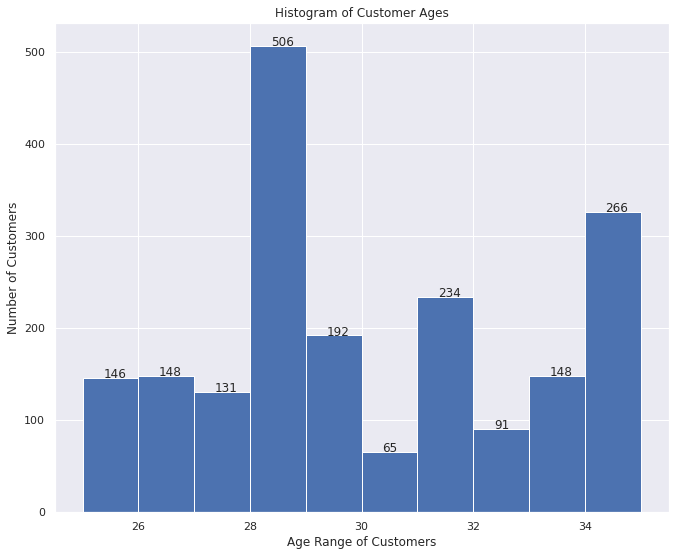

In [5]:
# Histogram of Age and set the range of bins from 25-35
bins = np.arange(25, 36)
ax = df['Age'].plot.hist(bins=bins)

# add labels
for p, label in zip(ax.patches, df['Age'].value_counts().sort_index()):
    ax.annotate(label, (p.get_x() + 0.37, p.get_height() + 0.15))

# title and axis
plt.title("Histogram of Customer Ages")
plt.xlabel("Age Range of Customers")
plt.ylabel("Number of Customers")
plt.show()

**Summary**

- There are 506 customers who are 28 years-old which is visualized as the most in this data set
- While customers who are 30 years-old are the least in this data set.

### Age with Target Variable Overlaid

**<font color='red'> Python code:</font>**

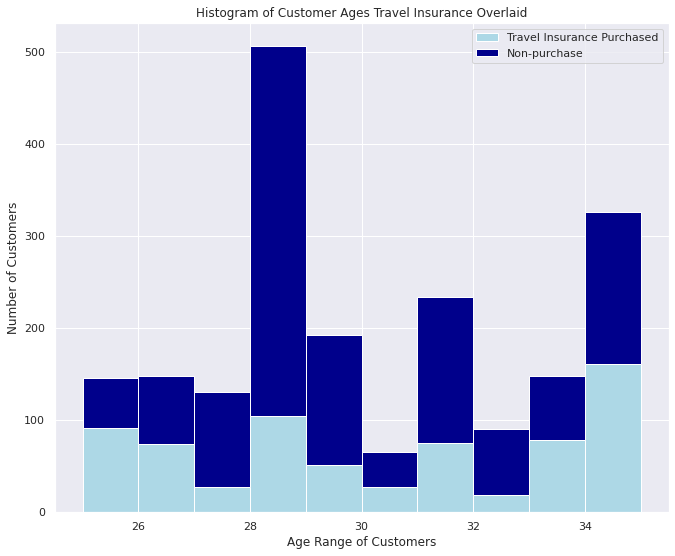

In [6]:
# Set up plot with response overlaid
n, bins, patches = plt.hist(
    [
        df[df['TravelInsurance'] == 1]['Age'],
        df[df['TravelInsurance'] == 0]['Age']
    ],
    bins=10,
    stacked=True,
    color=["lightblue", "darkblue"],
)

# title and axis
labels = ["Travel Insurance Purchased", "Non-purchase"]
plt.legend(labels)
plt.title("Histogram of Customer Ages Travel Insurance Overlaid")
plt.xlabel("Age Range of Customers")
plt.ylabel('Number of Customers')
plt.show()

**Summary**

- It is difficult to compare between age groups with target variable overlaid
- Therefore, it is better to focus on one class from the target variable and analyze age in a normalized histogram. 
- The following is visualized below.

### Normalized Histogram with Target Variable Overlaid on Age

**<font color='red'> Python code:</font>**

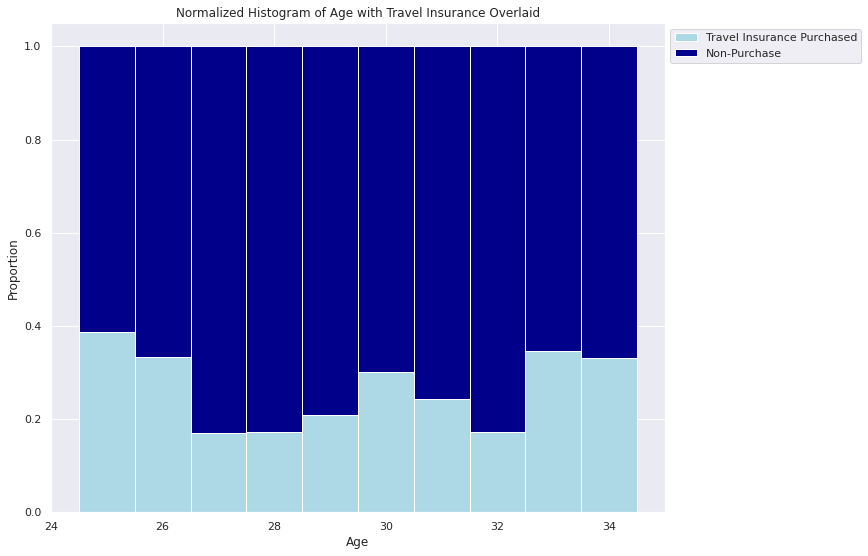

In [7]:
# Create normalized histogram for age groups by target overlay
n_table = np.column_stack((n[0], n[1]))  # stack the tables
n_norm = n_table / n_table.sum(axis=1)[:,
                                       None]  # create normalized tables by sum
ourbins = np.column_stack((bins[0:10], bins[1:11]))  # create table bins

p1 = plt.bar(x=ourbins[:, 0],
             height=n_norm[:, 0],
             width=ourbins[:, 1] - ourbins[:, 0],color = "lightblue")  # first bar chart
p2 = plt.bar(
    x=ourbins[:, 0],
    height=n_norm[:, 1],
    width=ourbins[:, 1] - ourbins[:, 0],  # second bar chart
    bottom=n_norm[:, 0], color = "darkblue")
# Annotate legend, title with x and y labels
plt.legend(['Travel Insurance Purchased', 'Non-Purchase'],
           bbox_to_anchor=(1, 1))
plt.title('Normalized Histogram of Age with Travel Insurance Overlaid')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()

**Summary**

- Insights for this graph show that it may be better to compare age classified into 2 groups instead such as customers who are in their twenties (20s) vs customers in their thirties (30s).

### Age Groups Comparison (20s vs. 30s)

**<font color='red'> Python code:</font>**

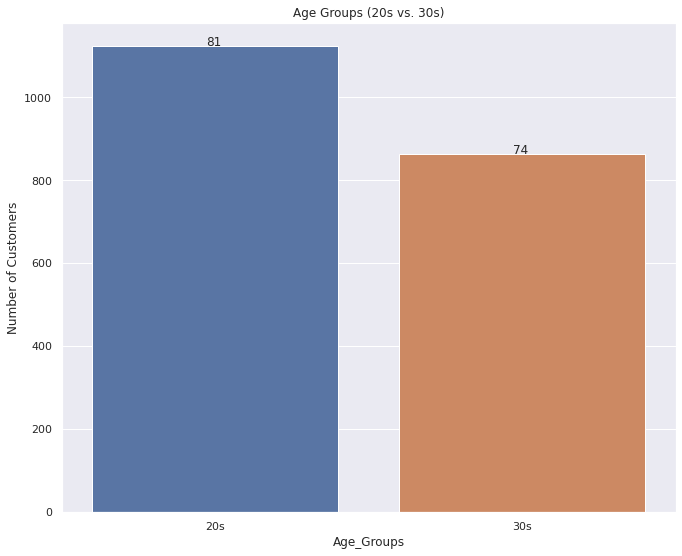

In [8]:
# Create function to categorize age groups
def age_groups(x):
    '''
    x: This is a value from df['Age']
    returns each as a new categorical value of 20s or 30s
    '''
    if x < 30:
        return '20s'
    else:
        return '30s'


# Apply age_groups function on each value
age_groups = pd.DataFrame(
    {'Age_Groups': df['Age'].apply(lambda x: age_groups(x)), 
     'AnnualIncome':df['AnnualIncome'],
    'TravelInsurance':df['TravelInsurance']})

# Graph count plot of age groups (20s vs. 30s)
ax = sns.countplot(data=age_groups, x="Age_Groups", order=['20s', '30s'])

# add labels
for p, label in zip(ax.patches, age_groups.value_counts()):
    ax.annotate(label, (p.get_x()+0.37, p.get_height()+0.15))
plt.title("Age Groups (20s vs. 30s)")
plt.ylabel('Number of Customers')
plt.show()

**Summary**

- Before visualizing the target variable overlaid, we can see here that after binning age into two groups, there are more customers who are in their 20s than customers in their 30s in this data set.

### Percentage of Travel Insurance Purchases on Various Features

**<font color='red'> Python code:</font>**

In [9]:
def make_stacked_barcharts(df, x):
    '''
    Takes in a data frame 'df' and a column 'x'
    and returns a stacked bar chart of the column
    with the percentage of purchases overlaid
    
    '''

    # Calculate total counts from both groups
    total = df.groupby(x)['TravelInsurance'].count().reset_index()

    # Calculate total counts from only purchases
    purchase = df[df.TravelInsurance == 1].groupby(
        x)['TravelInsurance'].count().reset_index()

    # get percentages for purchases
    purchase['TravelInsurance'] = [
        i / j * 100
        for i, j in zip(purchase['TravelInsurance'], total['TravelInsurance'])
    ]

    # get percentages
    total['TravelInsurance'] = [
        i / j * 100
        for i, j in zip(total['TravelInsurance'], total['TravelInsurance'])
    ]

    # bar chart 1 -> top bars (group of 'TravelInsurance=0')
    bar1 = sns.barplot(x, y="TravelInsurance", data=total, color='darkblue')

    # bar chart 2 -> bottom bars (group of 'TravelInsurance=1')
    bar2 = sns.barplot(x,
                       y="TravelInsurance",
                       data=purchase,
                       color='lightblue')

    # add legend
    top_bar = mpatches.Patch(color='darkblue', label='Non-Purchase')
    bottom_bar = mpatches.Patch(color='lightblue',
                                label='Travel Insurance Purchased')
    plt.legend(handles=[top_bar, bottom_bar],
               bbox_to_anchor=(1.05, 1),
               loc=2,
               borderaxespad=0.)
    # Aesthetics
    plt.title("Percentage of Travel Insurance Purchases by " + x)
    plt.xlabel(x)
    plt.ylabel("% of Purchases")

    # Change ticks on x-axis for ChronicDiseases column
    if x == "ChronicDiseases":
        chronicdiease = [0, 1]
        labels = ['No', 'Yes']
        plt.xticks(chronicdiease, labels)

    # show the graph
    plt.show()

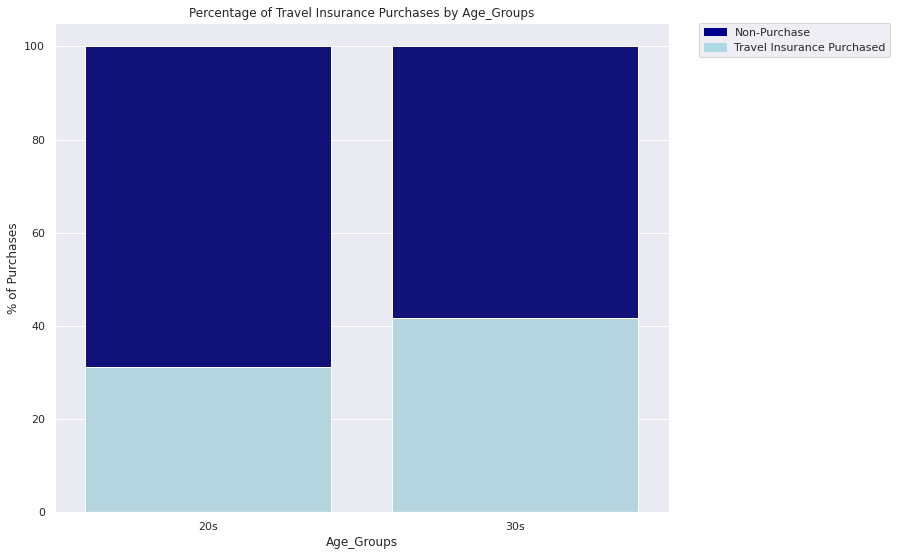

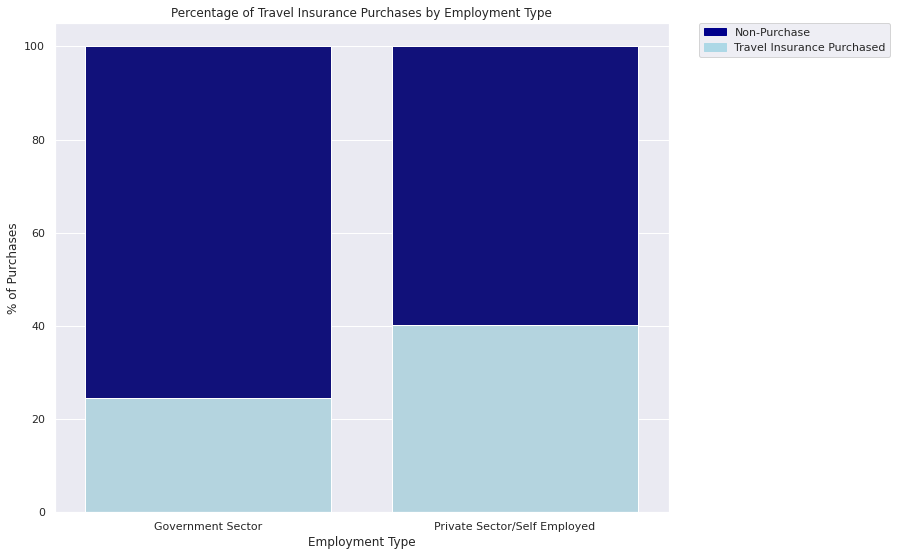

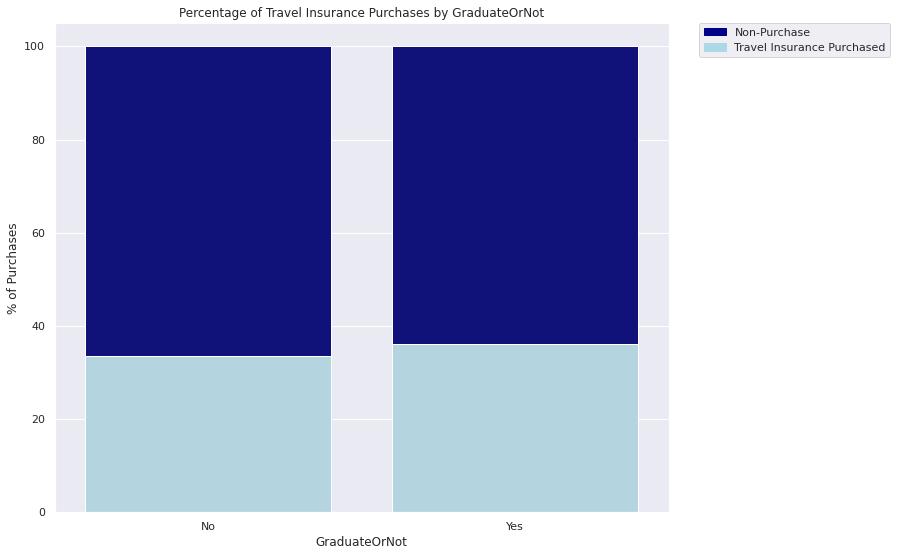

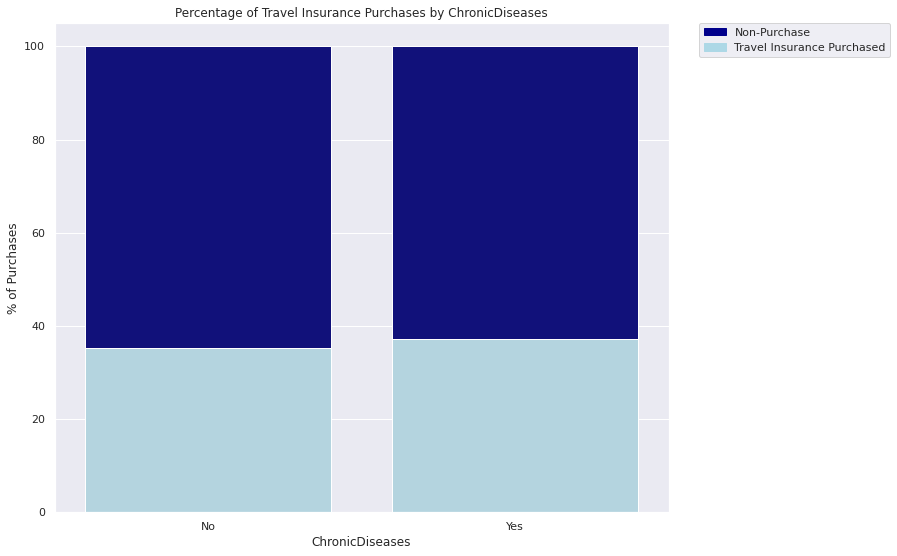

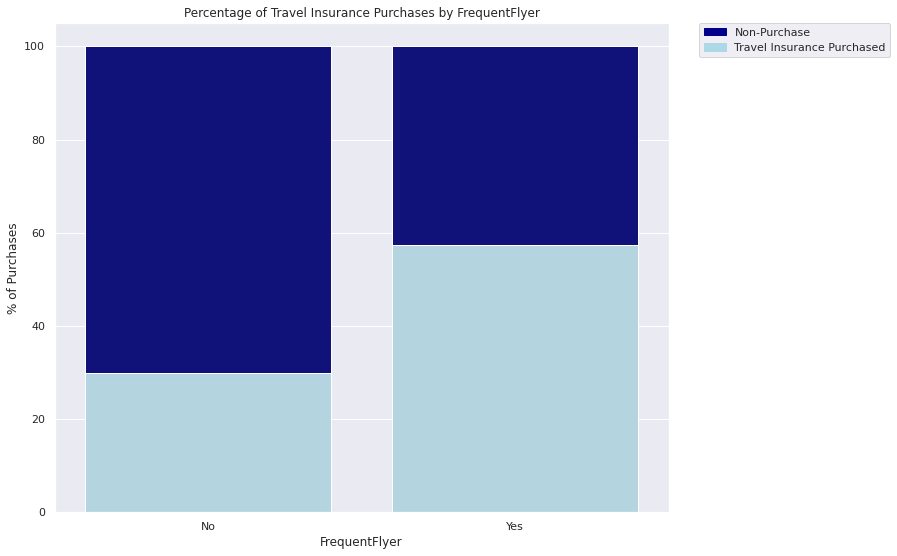

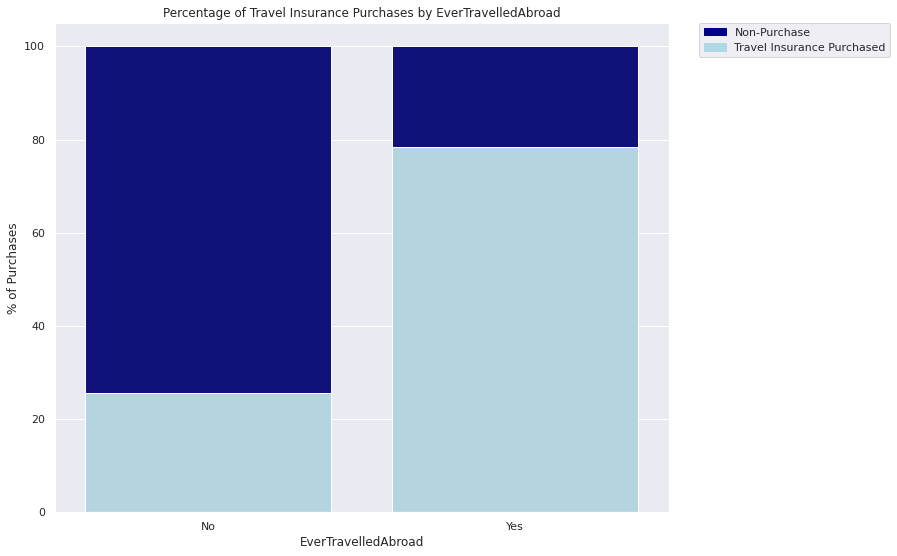

In [10]:
# Call stacked bar chart function
make_stacked_barcharts(age_groups, 'Age_Groups')

# Make stacked bar charts on various columns
plot_columns = [
    'Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
    'EverTravelledAbroad'
]

# Plot each column
for i in plot_columns:
    make_stacked_barcharts(df, i)

**Summary**

- There is a higher proportion of customers in their 30s that purchased travel insurance.
- There is a higher proportion of customers who works in a private sector or is self-employed that purchased travel insurance.
- There is no significant difference in proportion between customers who are a college graduate or not that purchased travel insurance.
- This also applies to customers with or without chronic diseases that purchased travel insurance.
- However, there is a higher proportion of customers who are frequent flyers and/or have traveled abroad that purchased travel insurance.

## Side-by-side Box-plots between Annual Income and Different Attributes 

**<font color='red'> Python code:</font>**

In [11]:
def make_boxplots(df, x):
    '''
    Takes in 'x' as a column from data frame 'df'
    and returns a side by side box-plot of 
    x on the x-axis and AnnualIncome on the y-axis
    seperated by different colors noted by TravelInsurance
    
    '''

    # Palatte to color the target variable
    palatte = {0: "darkblue", 1: "lightblue"}
    
    # Change x-axis labels if age_groups or GraduatedOrNot
    order = None
    if x == "Age_Groups":
        order = ["20s", "30s"]
    if x == "GraduateOrNot":
        order = ["No", "Yes"]

    # Boxplot
    sns.boxplot(x=x,
                y="AnnualIncome",
                hue="TravelInsurance",
                data=df,
                order=order,
                palette=palatte)

    # Legend properties
    top_bar = mpatches.Patch(color='darkblue', label='Non-purchase')
    bottom_bar = mpatches.Patch(color='lightblue',
                                label='Travel Insurance Purchased')
    plt.legend(handles=[top_bar, bottom_bar],
               bbox_to_anchor=(1.05, 1),
               loc=2,
               borderaxespad=0.)

    # Graph Properties
    plt.title(x + " vs. Annual Income with Travel Insurance Overlaid ")
    plt.xlabel(x)
    plt.ylabel("Annual Income (1e6)")

    # Change ticks on x-axis for ChronicDiseases column
    if x == "ChronicDiseases":
        chronicdiease = [0, 1]
        labels = ['No', 'Yes']
        plt.xticks(chronicdiease, labels)

    # show the graph
    plt.show()

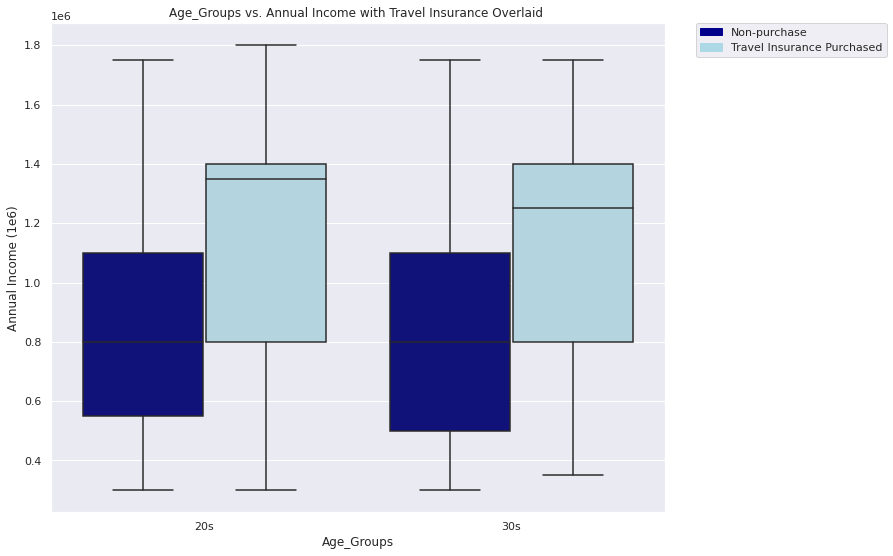

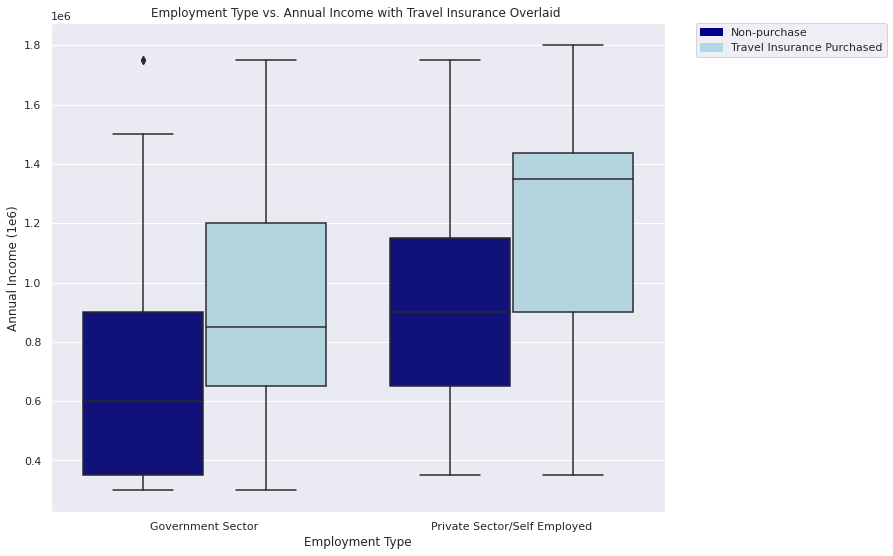

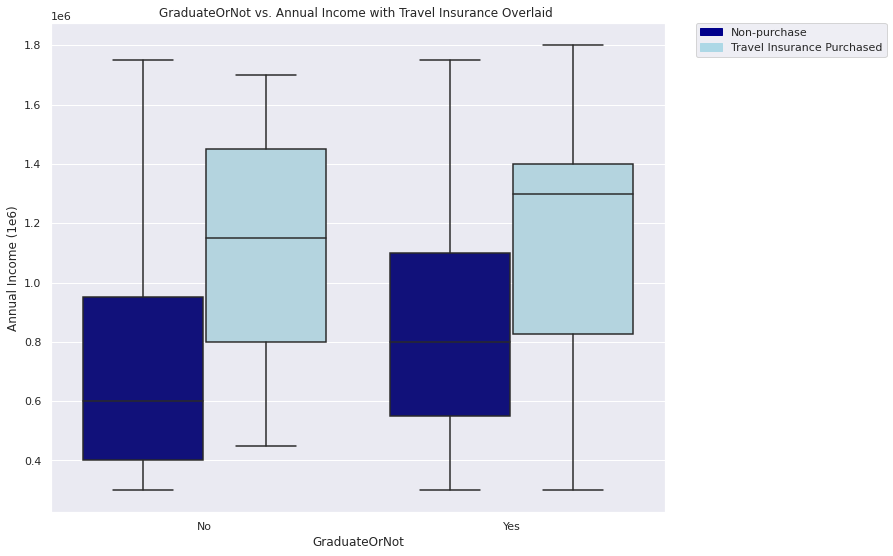

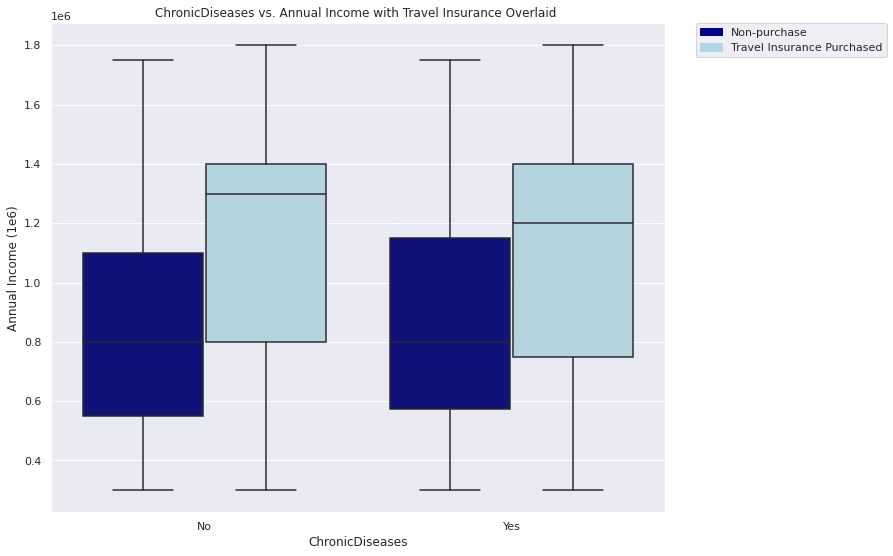

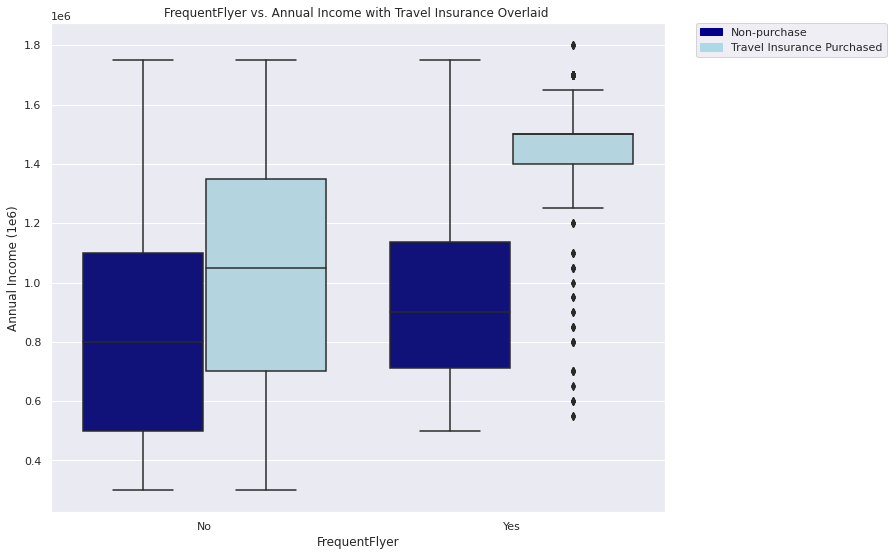

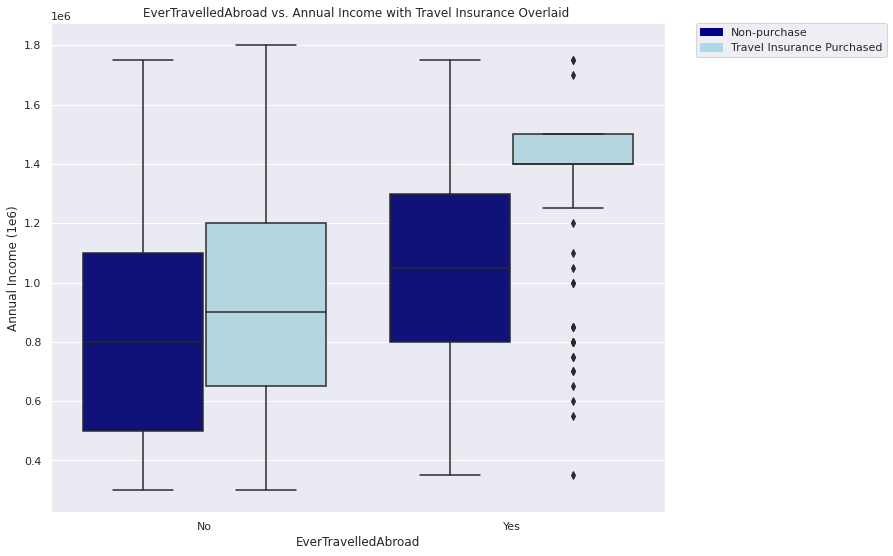

In [12]:
# call stacked bar chart function
make_boxplots(age_groups, 'Age_Groups')

# call boxplot function on various columns
plot_columns = ['Employment Type', 'GraduateOrNot','ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad']

# plot each column
for i in plot_columns:
    # boxplot function
    make_boxplots(df, i)

-----
# Data Wrangling and Pre-Processing


- Handling of missing values, outliers, correlated features, etc.

**<font color='red'> Python code:</font>**

-----
# Data splitting

- Training, validation, and test sets


**<font color='red'> Python code:</font>**

----


# Model building strategies

- Describing main research questions and appropriate analytics methods


**<font color='red'> Python code:</font>**

----
# Model performance and hyper-parameter tuning

- Model tuning, comparison, and evaluations

**<font color='red'> Python code:</font>**

-----
# Results and final model selection

- Performance measures on test Set

**<font color='red'> Python code:</font>**

---------
# Discussion and conclusion

- Address the problem statement and suggestions that could go beyond the scope of the course